# Project



## Import libraries

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [4]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

In [5]:
newsgroups.filenames.shape

(18846,)

In [6]:
newsgroups.target.shape

(18846,)

In [7]:
newsgroups.target[:10]

array([10,  3, 17,  3,  4, 12,  4, 10, 10, 19])

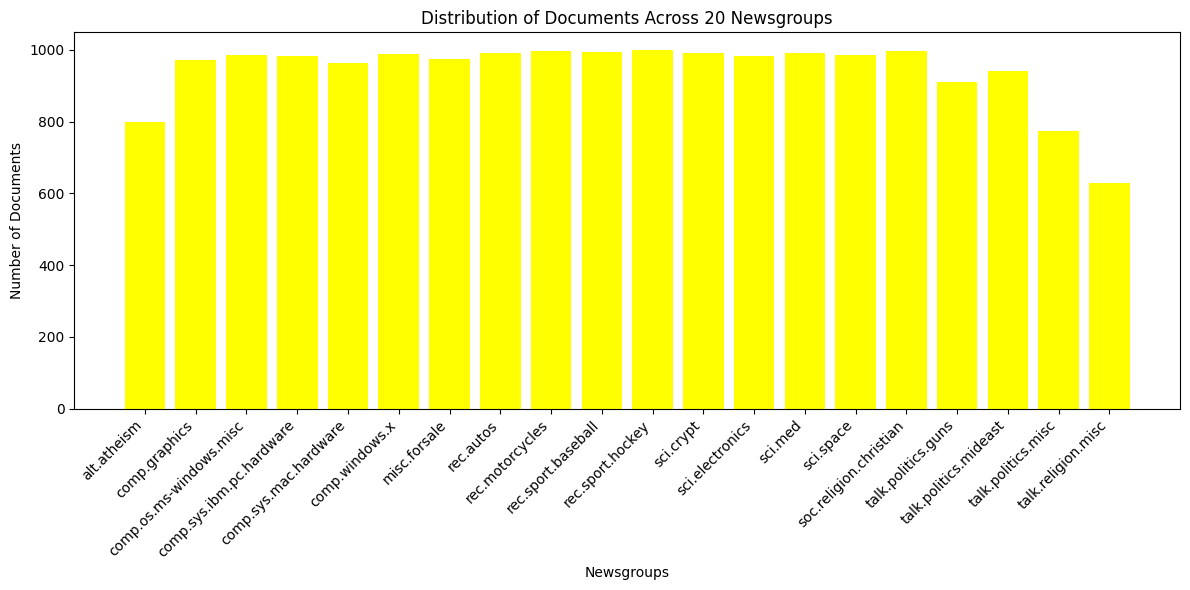

In [8]:
counts = np.unique(newsgroups.target, return_counts=True)

# Extract newsgroup names from target names
newsgroup_names = [newsgroups.target_names[i] for i in counts[0]]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(newsgroup_names, counts[1], color='yellow')
plt.title('Distribution of Documents Across 20 Newsgroups')
plt.xlabel('Newsgroups')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

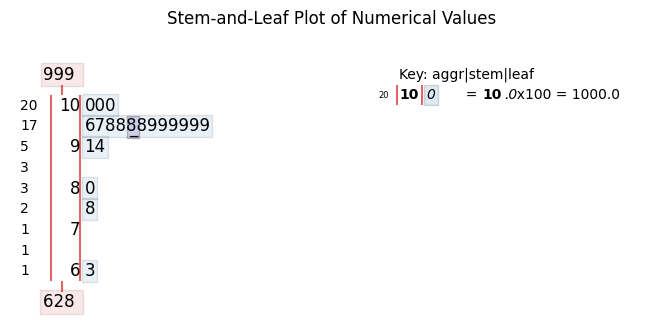

In [10]:
from stemgraphic import stem_graphic

stem_graphic(counts[1])
plt.title('Stem-and-Leaf Plot of Numerical Values')
plt.show()

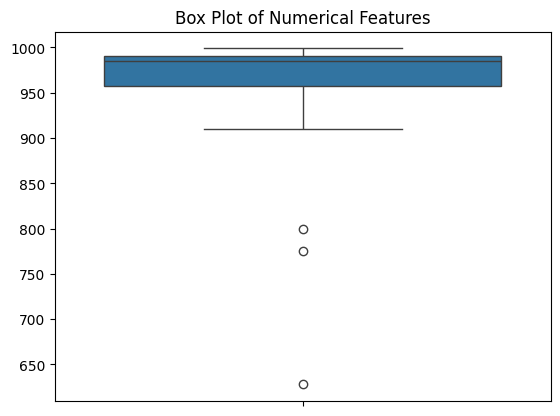

In [11]:
sns.boxplot(data=counts[1])
plt.title('Box Plot of Numerical Features')
plt.show()

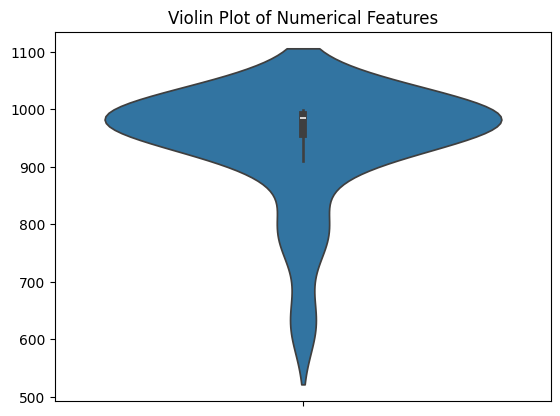

In [12]:
sns.violinplot(data=counts[1])
plt.title('Violin Plot of Numerical Features')
plt.show()

TF-IDF vectorizer to convert text data into numerical features.

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Naive Bayes classifier (MultinomialNB)

In [14]:
# Set uniform class priors.
num_classes = len(newsgroups.target_names)
uniform_class_priors = [1 / num_classes] * num_classes

In [15]:
nb_classifier = MultinomialNB(class_prior=uniform_class_priors)
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB(class_prior=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                           0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                           0.05, 0.05])

Prior probabilities

In [16]:
prior_probabilities = nb_classifier.class_prior
print(prior_probabilities)

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


Likelihood probabilities

In [17]:
likelihood_probabilities = nb_classifier.class_log_prior_
print(likelihood_probabilities)

[-2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227 -2.99573227
 -2.99573227 -2.99573227]


Posterior probabilities

In [18]:
posterior_probabilities = nb_classifier.predict_proba(X_test_tfidf)
print(posterior_probabilities)

[[0.04396927 0.01531469 0.02187573 ... 0.03516181 0.03561802 0.02399221]
 [0.00652663 0.1833227  0.41617036 ... 0.00342001 0.00640847 0.00620084]
 [0.05688561 0.03606293 0.02814703 ... 0.0507269  0.04792915 0.03740969]
 ...
 [0.18461964 0.01923209 0.01934724 ... 0.11675574 0.05487763 0.06442059]
 [0.03386052 0.00360652 0.0034189  ... 0.0526024  0.15094526 0.08886656]
 [0.02534129 0.17657072 0.16409095 ... 0.01168536 0.01700359 0.01287489]]


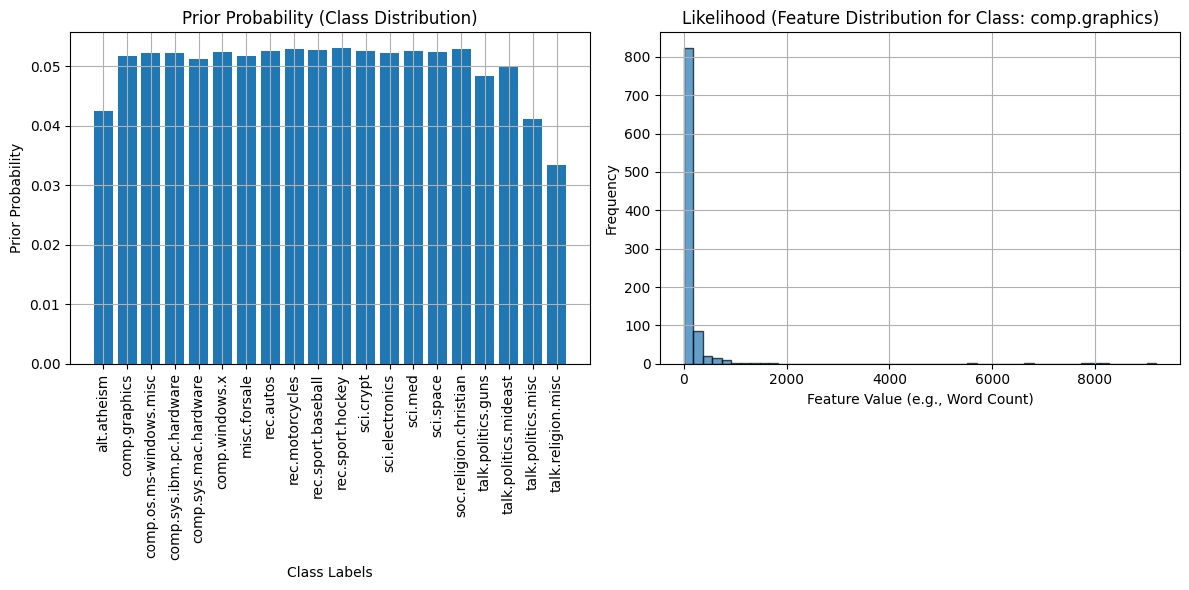

In [19]:
# Select a specific class (e.g., 'comp.graphics') for visualization.
target_class = 'comp.graphics'
class_id = newsgroups.target_names.index(target_class)

# Calculate the prior probability (distribution of class labels).
prior_probabilities = np.bincount(newsgroups.target) / len(newsgroups.target)

# Calculate the likelihood (distribution of a specific feature for the selected class).
feature_values = [len(document.split()) for document in newsgroups.data]
likelihood_values = [feature_values[i] for i in range(len(feature_values)) if newsgroups.target[i] == class_id]

# Create subplots for the prior probability and likelihood.
plt.figure(figsize=(12, 6))

# Plot Prior Probability (distribution of class labels).
plt.subplot(1, 2, 1)
plt.bar(range(len(prior_probabilities)), prior_probabilities)
plt.xlabel('Class Labels')
plt.ylabel('Prior Probability')
plt.title('Prior Probability (Class Distribution)')
plt.xticks(range(len(newsgroups.target_names)), newsgroups.target_names, rotation=90)
plt.grid(True)

# Plot Likelihood (distribution of a specific feature for the selected class).
plt.subplot(1, 2, 2)
plt.hist(likelihood_values, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Feature Value (e.g., Word Count)')
plt.ylabel('Frequency')
plt.title('Likelihood (Feature Distribution for Class: ' + target_class + ')')
plt.grid(True)

plt.tight_layout()
plt.show()


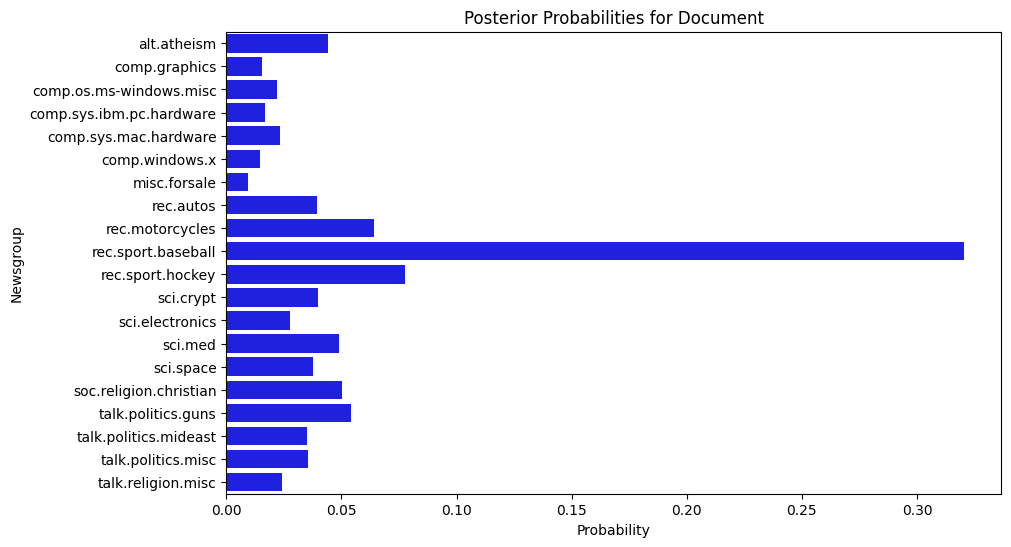

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming you have already calculated the posterior probabilities
# using nb_classifier.predict_proba(X_test_tfidf).

# Select a specific document's posterior probabilities (change index as needed).
document_index = 0
probabilities = posterior_probabilities[document_index]

# Get class labels (newsgroup names) for the 20 Newsgroups dataset.
class_labels = newsgroups.target_names

# Create a bar chart to visualize the probabilities.
plt.figure(figsize=(10, 6))
sns.barplot(x=probabilities, y=class_labels, color='blue')
plt.xlabel('Probability')
plt.ylabel('Newsgroup')
plt.title('Posterior Probabilities for Document')
plt.show()


Predictions

In [21]:
y_pred = nb_classifier.predict(X_test_tfidf)

Results

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


Metrics

In [23]:
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)
print(report)

                          precision    recall  f1-score   support

             alt.atheism       0.28      0.42      0.34       236
           comp.graphics       0.55      0.65      0.60       287
 comp.os.ms-windows.misc       0.66      0.64      0.65       290
comp.sys.ibm.pc.hardware       0.55      0.68      0.61       285
   comp.sys.mac.hardware       0.74      0.59      0.66       312
          comp.windows.x       0.80      0.75      0.77       308
            misc.forsale       0.76      0.68      0.72       276
               rec.autos       0.77      0.67      0.72       304
         rec.motorcycles       0.72      0.72      0.72       279
      rec.sport.baseball       0.84      0.78      0.81       308
        rec.sport.hockey       0.90      0.84      0.87       309
               sci.crypt       0.78      0.73      0.75       290
         sci.electronics       0.68      0.55      0.60       304
                 sci.med       0.82      0.75      0.78       300
         

KNN

In [24]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics

# # Extract features using TF-IDF
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(newsgroups.data)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, newsgroups.target, test_size=0.2, random_state=42)


# # Create a KNN classifier with k=5
# knn = KNeighborsClassifier(n_neighbors=5)

# # Train the classifier on the training set
# knn.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = knn.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = metrics.accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

In [25]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics

# # Extract features using TF-IDF
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(newsgroups.data)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, newsgroups.target, test_size=0.2, random_state=42)

# # Create a KNN classifier with k=3
# knn = KNeighborsClassifier(n_neighbors=3)

# # Train the classifier on the training set
# knn.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = knn.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = metrics.accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

Evaluate the error on data that wasn’t yet known by the model

In [26]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# test_preds = knn.predict(X_test)
# mse = mean_squared_error(y_test, test_preds)
# rmse = sqrt(mse)
# rmse

In [27]:
# cmap = sns.cubehelix_palette(as_cmap=True)
# f, ax = plt.subplots()
# points = ax.scatter(
#     X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap=cmap
# )
# f.colorbar(points)
# plt.show()

Fitting a kNN Regression

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [29]:
# Extract features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, newsgroups.target, test_size=0.2, random_state=12345
)

In [30]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

4.254960843985607

Evaluate the error on data that wasn’t yet known by the model

In [32]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

5.33009682964395

ValueError: 'c' argument has 3770 elements, which is inconsistent with 'x' and 'y' with size 1.

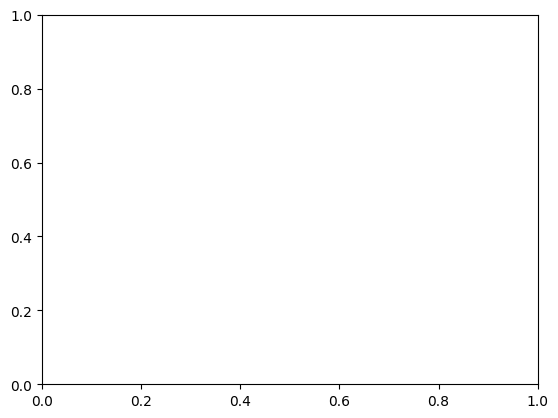

In [33]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Assume 'data' contains the 20 Newsgroups dataset

# Visualize Bar Chart of News Categories
plt.figure(figsize=(12, 6))
sns.countplot(x='target', data=data)
plt.xlabel('News Category')
plt.ylabel('Count')
plt.title('Distribution of News Categories')
plt.show()

# Visualize Word Clouds for Each News Category
def plot_wordcloud(category_text, category_name):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category_name}')
    plt.show()

for i in range(data.target.nunique()):
    category_text = " ".join(data[data.target == i].text)
    plot_wordcloud(category_text, data.target_names[i])

# Visualize t-SNE
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data.text)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=data.target)
plt.title('t-SNE Visualization of News Categories')
plt.show()


: 